# Graph Network analysis of Game Of Life

In [1]:
import os
import numpy as np
# Create the parent folder
parent_folder = "Transition_matrix_related"
os.makedirs(parent_folder, exist_ok=True)

# Create the subfolder
subfolder = os.path.join(parent_folder, "Graph observations")
os.makedirs(subfolder, exist_ok=True)
# Define the save path for plots
save_path = os.path.join(subfolder, "plots")
os.makedirs(save_path, exist_ok=True)


### Observations

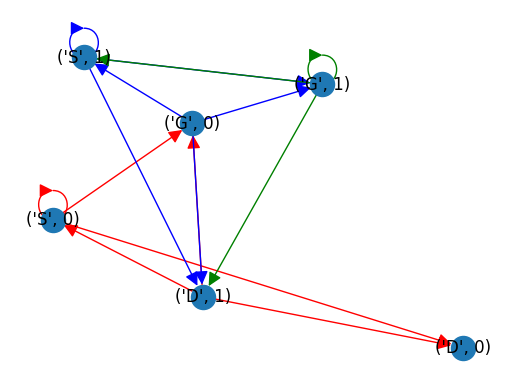

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
 
 
# Create an empty directed graph
graph = nx.DiGraph()

# Define the nodes
nodes = [('D', 0), ('D', 1), ('S', 0), ('S', 1), ('G', 0), ('G', 1)]

# Add nodes to the graph
graph.add_nodes_from(nodes)

# Define the edges based on the conditions
edges = []

# Iterate over all nodes
for node in nodes:
    if node[0] == 'D' and node[1] == 1:
        # Decay condition  
        edges.extend([(node, (other_node[0], 0)) for other_node in nodes])
    elif node[0] == 'S':
        # Stability condition  
        target_state = node[1]
        edges.extend([(node, other_node) for other_node in nodes if other_node[1] == target_state])
    elif node[0] == 'G':
        # Growth condition  
        if node[1] == 1:
            # Connect S=1 to all S=1 nodes
            edges.extend([(node, other_node) for other_node in nodes if other_node[1] == 1])
        else:
            # Connect S=0 to all S=1 nodes
            edges.extend([(node, other_node) for other_node in nodes if other_node[1] == 1])

# Define the edge colors
edge_colors = ['red' if edge[0][0] == 'D' else 'blue' if edge[0][0] == 'S' else 'green' for edge in edges]

# Add edges to the graph with colors
graph.add_edges_from(edges)

# Create a plot
fig, ax = plt.subplots()
nx.draw(graph, ax=ax, with_labels=True, edge_color=edge_colors, arrows=True, arrowsize=20)

# Save the plot
 
save_name = "Condition_State Graph.png"
save_file = os.path.join(save_path, save_name)
plt.savefig(save_file)

# Show the plot
plt.show()


(('D', 1), ('D', 0))
(('D', 1), ('D', 0))
(('D', 1), ('D', 0))
(('D', 1), ('D', 0))
(('D', 1), ('D', 0))
(('D', 1), ('D', 0))


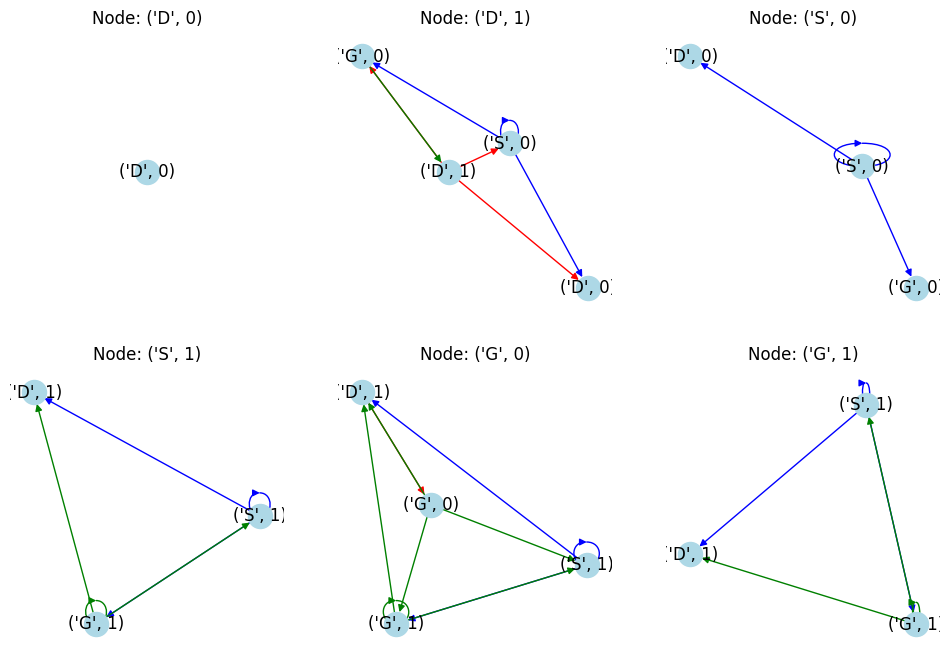

In [3]:
# Assuming 'graph' and 'nodes' are already defined as per your earlier code

def display_node_connections_in_subplot(graph, ax, selected_node):
    # Find all nodes connected to the selected node
    connected_nodes = [node for node in graph.nodes() if graph.has_edge(selected_node, node)]

    # Create a subgraph including the selected node and all connected nodes
    subgraph_nodes = [selected_node] + connected_nodes
    subgraph = graph.subgraph(subgraph_nodes)
    print(edges[0])
    edge_colors = ['red' if edge[0][0] == 'D' else 'blue' if edge[0][0] == 'S' else 'green' for edge in subgraph.edges()]

    nx.draw(subgraph, ax=ax, with_labels=True, node_color='lightblue', edge_color=edge_colors, arrows=True)
    ax.set_title(f'Node: {selected_node}')

# Determine the number of subplots needed (one for each node)
num_nodes = len(nodes)
num_cols = 3  # You can adjust the number of columns
num_rows = (num_nodes + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each node's connections in a separate subplot
for i, node in enumerate(nodes):
    display_node_connections_in_subplot(graph, axs[i], node)

# Hide any unused subplots
for i in range(len(nodes), len(axs)):
    axs[i].axis('off')

 
save_name = "All_Node_Connections.png"
save_file = os.path.join(save_path, save_name)
plt.savefig(save_file)

# Show the plot
plt.show()


### Mean field approximation



In [4]:
from scipy.special import comb
def binomial_probability(n, k, p):
    """
    Args:
    n (int): number of gaps
    k (int): number of s=1 to place
    p (float): probability being s=1
    """
    probability = comb(n, k) * (p**k) * ((1-p)**(n-k))
    return probability

def calculate_node_probability(cond, state, p):
    """
    Calculate the probability of being in a particular node with a given condition and state.
    
    Args:
    cond (str): Condition of the node ('G' for Growth, 'S' for Stability, 'D' for Decay).
    state (int): State of the node (1 or 0).
    p (float): Probability of being state 1.

    Returns:
    float: Probability of being in the specified node.
    """
    if cond == 'G':
        # Growth condition
        binom_prob = binomial_probability(8, 3, p)
    elif cond == 'S':
        # Stability condition
        binom_prob = binomial_probability(8, 2, p)
    elif cond == 'D':
        # Decay condition
        binom_prob = 1 - (binomial_probability(8, 3, p) + binomial_probability(8, 2, p))
    else:
        raise ValueError("Invalid condition specified. Use 'G' for Growth, 'S' for Stability, or 'D' for Decay.")

    # Calculate the probability based on the state
    if state == 1:
        return binom_prob * p
    elif state == 0:
        return binom_prob * (1 - p)
    else:
        raise ValueError("Invalid state specified. State must be 1 or 0.")

# Example usage:
# Calculate the probability of being in each node for p=0.6
p = 0.29
probabilities = {}
for cond in ['G', 'S', 'D']:
    for state in [0, 1]:
        probabilities[(cond, state)] = calculate_node_probability(cond, state, p)

probabilities


{('G', 0): 0.17495731817475896,
 ('G', 1): 0.0714614398178593,
 ('S', 0): 0.21417188948979116,
 ('S', 1): 0.08747865908737949,
 ('D', 0): 0.32087079233544985,
 ('D', 1): 0.1310599010947612}

In [5]:
# Define the states and conditions
states = ['S', 'G', 'D']
conditions = [0, 1]

# Create an empty transition matrix
transition_matrix = np.zeros((len(states), len(conditions)))

# Fill in the transition matrix with the probabilities
for i, state in enumerate(states):
    for j, condition in enumerate(conditions):
        transition_matrix[i, j] = probabilities[(state, condition)]

# Display the transition matrix
print("   ", end="")
for condition in conditions:
    print(f" {condition} ", end="")
print()
for i, state in enumerate(states):
    print(f"{state} ", end="")
    for j, condition in enumerate(conditions):
        print(f"{transition_matrix[i, j]:.3f} ", end="")
    print()


    0  1 
S 0.214 0.087 
G 0.175 0.071 
D 0.321 0.131 


### Graphs + Transition matrix

In [6]:
 
 
from scipy.special import comb
  

def assign_probabilities_to_graph(graph, p):
    """
    Assign probabilities to nodes and edges in the graph.

    Args:
    graph (networkx.Graph): The graph to which probabilities will be assigned.
    p (float): Probability of being state 1.

    Returns:
    networkx.Graph: The graph with probabilities assigned to nodes and edges.
    """
    # Assign probabilities to the nodes
    for node in graph.nodes():
        cond, state = node
         
        probability = calculate_node_probability(cond, state, p)
 
        graph.nodes[node]['probability'] = probability

    # Assign probabilities to the edges
    for edge in graph.edges():
        _, target_node = edge
        # The edge probability is the same as the target node's probability
        graph.edges[edge]['probability'] = graph.nodes[target_node]['probability']


    # Calculate total outgoing probabilities for each node
    total_outgoing_prob = {node: 0 for node in graph.nodes()}
    for edge in graph.edges():
        source_node, target_node = edge
        total_outgoing_prob[source_node] += graph.nodes[target_node]['probability']
    # Assign and normalize probabilities to the edges
    for edge in graph.edges():
        source_node, target_node = edge
        target_prob = graph.nodes[target_node]['probability']
        normalized_prob = target_prob / total_outgoing_prob[source_node] if total_outgoing_prob[source_node] > 0 else 0
        graph.edges[edge]['probability'] = normalized_prob
    return graph
 

graph_forLGOL=graph.copy()

graph=assign_probabilities_to_graph(graph, 0.29)
print("Node Probabilities:")
for node in graph.nodes(data=True):
    print(node)

print("\nEdge Probabilities:")
for edge in graph.edges(data=True):
    print(edge)
  

Node Probabilities:
(('D', 0), {'probability': 0.32087079233544985})
(('D', 1), {'probability': 0.1310599010947612})
(('S', 0), {'probability': 0.21417188948979116})
(('S', 1), {'probability': 0.08747865908737949})
(('G', 0), {'probability': 0.17495731817475896})
(('G', 1), {'probability': 0.0714614398178593})

Edge Probabilities:
(('D', 1), ('D', 0), {'probability': 0.4519306934302111})
(('D', 1), ('S', 0), {'probability': 0.30165054857717066})
(('D', 1), ('G', 0), {'probability': 0.24641875799261825})
(('S', 0), ('D', 0), {'probability': 0.4519306934302111})
(('S', 0), ('S', 0), {'probability': 0.30165054857717066})
(('S', 0), ('G', 0), {'probability': 0.24641875799261825})
(('S', 1), ('D', 1), {'probability': 0.4519306934302111})
(('S', 1), ('S', 1), {'probability': 0.30165054857717066})
(('S', 1), ('G', 1), {'probability': 0.24641875799261828})
(('G', 0), ('D', 1), {'probability': 0.4519306934302111})
(('G', 0), ('S', 1), {'probability': 0.30165054857717066})
(('G', 0), ('G', 1), {

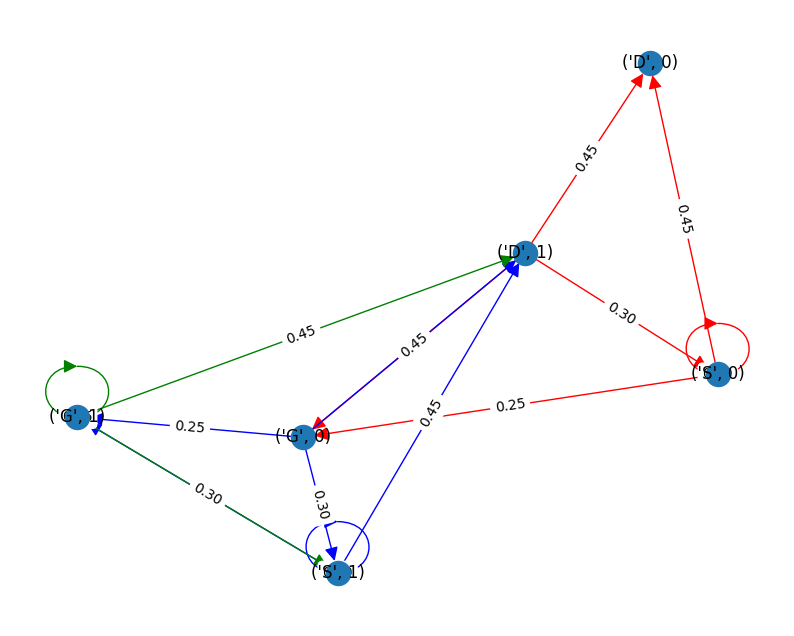

In [7]:
# Create a plot with a bigger figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, ax=ax, pos=pos, with_labels=True, edge_color=edge_colors, arrows=True, arrowsize=20)

# Draw the edge labels with rounded probabilities
edge_labels = {(u, v): f"{prob:.2f}" for (u, v, prob) in graph.edges.data('probability')}
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels)

# Save the plot
save_name = "Graph_with_Probabilities.png"
save_file = os.path.join(save_path, save_name)
plt.savefig(save_file)

# Show the plot
plt.show()


Degree Centrality:
{('D', 0): 0.4, ('D', 1): 1.2000000000000002, ('S', 0): 1.0, ('S', 1): 1.2000000000000002, ('G', 0): 1.0, ('G', 1): 1.2000000000000002}
Betweenness Centrality:
{('D', 0): 0.0, ('D', 1): 0.4, ('S', 0): 0.0, ('S', 1): 0.0, ('G', 0): 0.25, ('G', 1): 0.0}
Closeness Centrality:
{('D', 0): 0.625, ('D', 1): 0.6400000000000001, ('S', 0): 0.45714285714285713, ('S', 1): 0.5333333333333333, ('G', 0): 0.5333333333333333, ('G', 1): 0.5333333333333333}
Eigenvector Centrality:
{('D', 0): 0.3035314262224579, ('D', 1): 0.4911232092140362, ('S', 0): 0.3035314262224579, ('S', 1): 0.4911232092140362, ('G', 0): 0.3035314262224579, ('G', 1): 0.4911232092140362}
PageRank Centrality:
{('D', 0): 0.13915860755349313, ('D', 1): 0.1941747257798401, ('S', 0): 0.13915860755349313, ('S', 1): 0.1941747257798401, ('G', 0): 0.13915860755349313, ('G', 1): 0.1941747257798401}


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

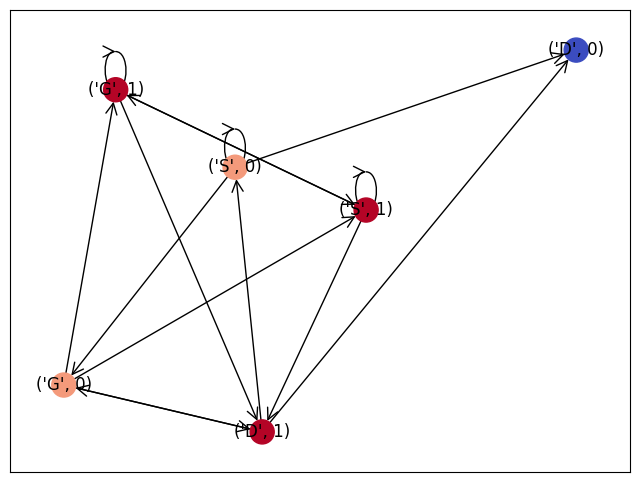

In [8]:
graph=graph_forLGOL.copy()


from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)
print("Degree Centrality:")
print(degree_centrality)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph, weight='probability')
print("Betweenness Centrality:")
print(betweenness_centrality)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(graph)
print("Closeness Centrality:")
print(closeness_centrality)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph, weight='probability')
print("Eigenvector Centrality:")
print(eigenvector_centrality)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(graph, weight='probability')
print("PageRank Centrality:")
print(pagerank_centrality)
 

# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)
centrality_folder = os.path.join(save_path, "centrality_measures"+"\\GOL")
os.makedirs(centrality_folder, exist_ok=True)

# Function to plot and save centrality measures
def plot_and_save_centrality(graph, centrality, title, filename):
    # Create a figure and draw the graph with the centrality values as node colors
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)  # Positioning the nodes of the graph
    nodes = nx.draw_networkx_nodes(graph, pos, node_color=list(centrality.values()), cmap='coolwarm')
    edges = nx.draw_networkx_edges(graph, pos, arrowstyle='->', arrowsize=20)
    labels = nx.draw_networkx_labels(graph, pos)
    
    # Create a color bar
    norm = Normalize(vmin=min(centrality.values()), vmax=max(centrality.values()))
    sm = ScalarMappable(norm=norm, cmap='coolwarm')
    sm.set_array([])  # You have to set_array for ScalarMappable.
    cbar = plt.colorbar(sm, orientation='vertical')
    cbar.set_label('Centrality')

    # Set the title and save the figure
    plt.title(title)
    plt.savefig(os.path.join(centrality_folder, filename))
    plt.close()

# Plot and save each centrality measure
plot_and_save_centrality(graph, degree_centrality, "Degree Centrality", "degree_centrality.png")
plot_and_save_centrality(graph, betweenness_centrality, "Betweenness Centrality", "betweenness_centrality.png")
plot_and_save_centrality(graph, closeness_centrality, "Closeness Centrality", "closeness_centrality.png")
plot_and_save_centrality(graph, eigenvector_centrality, "Eigenvector Centrality", "eigenvector_centrality.png")
plot_and_save_centrality(graph, pagerank_centrality, "PageRank Centrality", "pagerank_centrality.png")

In [9]:
# Probability of being in state 1
p = 0.6

# Assign probabilities to nodes and edges
graph_with_probs = assign_probabilities_to_graph(graph_copy, p)

# Now, graph_with_probs has probabilities assigned to each node and edge
print("Node Probabilities:")
for node in graph_with_probs.nodes(data=True):
    print(node)

print("\nEdge Probabilities:")
for edge in graph_with_probs.edges(data=True):
    print(edge)

NameError: name 'graph_copy' is not defined

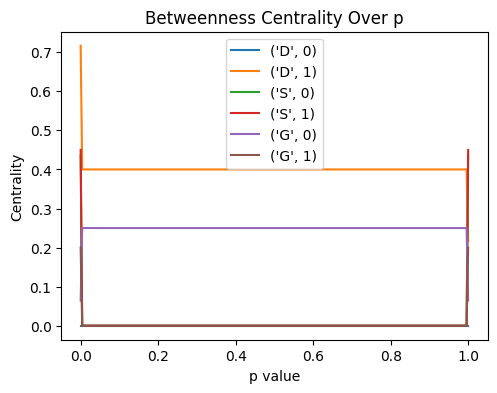

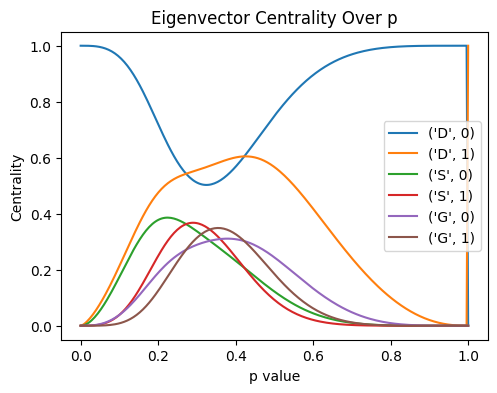

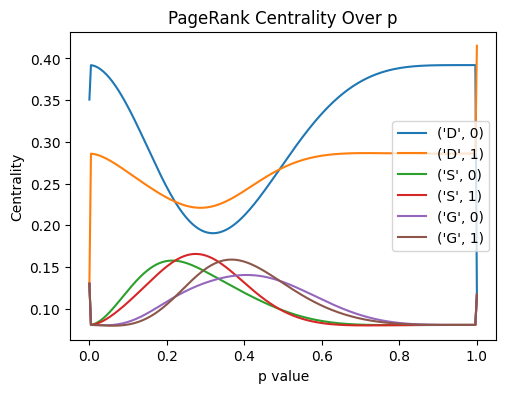

In [10]:
p_values = np.linspace(0, 1, 250)

# Initialize dictionaries to store centrality measures for each node at each p value
betweenness_centrality_values = {node: [] for node in graph.nodes()}
eigenvector_centrality_values = {node: [] for node in graph.nodes()}
pagerank_centrality_values = {node: [] for node in graph.nodes()}

 
# Calculate centrality measures for each p value
for p in p_values:
    graph_with_probs = assign_probabilities_to_graph(graph.copy(), p)
    
    graph_for_betweenness = graph_with_probs.copy()
    for u, v, d in graph_for_betweenness.edges(data=True):
        if d['probability'] != 0:  # Avoid division by zero
            d['weight'] = 1 / d['probability']
        else:
            d['weight'] = float('inf')  # Assign a very high weight for zero probability

    # Calculate betweenness centrality with modified weights
    betweenness_centrality = nx.betweenness_centrality(graph_for_betweenness, weight='weight')
    
    eigenvector_centrality = nx.eigenvector_centrality_numpy(graph_with_probs, weight='probability')  # Using numpy version for larger graphs
    pagerank_centrality = nx.pagerank(graph_with_probs, weight='probability')

    # Store the centrality values for each node
    for node in graph.nodes():
        betweenness_centrality_values[node].append(betweenness_centrality[node])
        eigenvector_centrality_values[node].append(eigenvector_centrality[node])
        pagerank_centrality_values[node].append(pagerank_centrality[node])

# Function to plot centrality measures
def plot_and_save_centrality_over_p(centrality_values, title, filename, save_path):
    plt.figure(figsize=(5.5, 4))
    for node, values in centrality_values.items():
        plt.plot(p_values, values, label=node)
    plt.xlabel('p value')
    plt.ylabel('Centrality')
    plt.title(title)
    plt.legend()
    plt.savefig(os.path.join(save_path, filename))
    plt.show()
    plt.close()

# Plot each centrality measure
plot_and_save_centrality_over_p(betweenness_centrality_values, "Betweenness Centrality Over p", "betweenness_centrality_over_p.png", centrality_folder)
plot_and_save_centrality_over_p(eigenvector_centrality_values, "Eigenvector Centrality Over p", "eigenvector_centrality_over_p.png", centrality_folder)
plot_and_save_centrality_over_p(pagerank_centrality_values, "PageRank Centrality Over p", "pagerank_centrality_over_p.png", centrality_folder)

### Matrix Formalism Calculations

In [11]:
from sympy import Matrix, symbols

# Define the symbols
T_1_D, T_1_S, T_1_G = symbols('T_1_D T_1_S T_1_G')
T_2_D, T_2_S, T_2_G = symbols('T_2_D T_2_S T_2_G')
T_3_D, T_3_S, T_3_G = symbols('T_3_D T_3_S T_3_G')
T_4_D, T_4_S, T_4_G = symbols('T_4_D T_4_S T_4_G')
T_5_D, T_5_S, T_5_G = symbols('T_5_D T_5_S T_5_G')
T_6_D, T_6_S, T_6_G = symbols('T_6_D T_6_S T_6_G')

# Define the matrix
M = Matrix([
    [T_1_D, 0, T_1_S, 0, T_1_G, 0],
    [0, T_2_D, 0, T_2_S, 0, T_2_G],
    [T_3_D, 0, T_3_S, 0, T_3_G, 0],
    [0, T_4_D, 0, T_4_S, 0, T_4_G],
    [0, T_5_D, 0, T_5_S, 0, T_5_G],
    [0, T_6_D, 0, T_6_S, 0, T_6_G]
])

 
eigenvects = M.eigenvects()

 
print("Eigenvectors:", eigenvects)

KeyboardInterrupt: 

# Logistic GOL Graph Analysis Extension

In [55]:
def calculate_edge_probability(cond1, state1, cond2, state2, Lambda, p):
    """
    Calculate edge probability based on conditions and states of nodes and Lambda.

    Args:
    cond1 (str): Condition of the source node.
    state1 (int): State of the source node.
    cond2 (str): Condition of the target node.
    state2 (int): State of the target node.
    Lambda (float): The parameter Lambda.
    p (float): Probability of being in state 1.

    Returns:
    float: Calculated probability for the edge.
    """
    m_max = 8  # You can adjust this if needed
    t1, t2, t3 = 1.5, 2.5, 3.5  # These are the example values from your previous code
    pd_0=p*(1 - Lambda) * (m_max - (t3 - t1))  
    pd_1=(1-p + p*Lambda) * (m_max - (t3 - t1))  
    ps_0=p*(t2 - t1)
    ps_1=(1-p) * (t2 - t1)
    pg_0=(p+Lambda-Lambda*p) * (t3 - t2)
    pg_1=(1-Lambda)*(1-p)*(t3 - t2)
    Dict={'D':{0:pd_0,1:pd_1},'S':{0:ps_0,1:ps_1},'G':{0:pg_0,1:pg_1}}
    Result=Dict[cond1][state1]*Dict[cond2][state2]
    return Result

def assign_probabilities_to_graph_with_lambda(graph, p, Lambda):
    """
    Assign probabilities to nodes and edges in the graph with Lambda parameter.

    Args:
    graph (networkx.Graph): The graph to which probabilities will be assigned.
    p (float): Probability of being state 1.
    Lambda (float): The parameter Lambda.

    Returns:
    networkx.Graph: The graph with probabilities assigned to nodes and edges.
    """
    # Assign probabilities to the nodes (as per your existing setup)
    # ...

    # Assign probabilities to the edges
    for edge in graph.edges():
        source_node, target_node = edge
        source_cond, source_state = source_node
        target_cond, target_state = target_node
        edge_prob = calculate_edge_probability(source_cond, source_state, target_cond, target_state, Lambda, p)
        graph.edges[edge]['probability'] = edge_prob


    total_outgoing_prob = {node: 0 for node in graph.nodes()}
    for edge in graph.edges():
        source_node, _ = edge
        total_outgoing_prob[source_node] += graph.edges[edge]['probability']

    # Normalize the edge probabilities
    for edge in graph.edges():
        source_node, _ = edge
        # Avoid division by zero
        if total_outgoing_prob[source_node] > 0:
            graph.edges[edge]['probability'] /= total_outgoing_prob[source_node]

    return graph



Lambda =  0.6 # Example Lambda value
p = 0.8 # Example probability value
graph_forLGOL = assign_probabilities_to_graph_with_lambda(graph_forLGOL, p, Lambda)
 

# Print the normalized edge probabilities
print("Normalized Edge Probabilities:")
for edge in graph_forLGOL.edges(data=True):
    print(edge)

Normalized Edge Probabilities:
(('D', 1), ('D', 0), {'probability': 0.5274725274725275})
(('D', 1), ('S', 0), {'probability': 0.21978021978021978})
(('D', 1), ('G', 0), {'probability': 0.2527472527472527})
(('S', 0), ('D', 0), {'probability': 0.5274725274725275})
(('S', 0), ('S', 0), {'probability': 0.21978021978021975})
(('S', 0), ('G', 0), {'probability': 0.2527472527472527})
(('S', 1), ('D', 1), {'probability': 0.9357798165137614})
(('S', 1), ('S', 1), {'probability': 0.045871559633027505})
(('S', 1), ('G', 1), {'probability': 0.018348623853211003})
(('G', 0), ('D', 1), {'probability': 0.9357798165137614})
(('G', 0), ('S', 1), {'probability': 0.04587155963302751})
(('G', 0), ('G', 1), {'probability': 0.018348623853211007})
(('G', 1), ('D', 1), {'probability': 0.9357798165137614})
(('G', 1), ('S', 1), {'probability': 0.045871559633027505})
(('G', 1), ('G', 1), {'probability': 0.018348623853211003})


In [56]:

def transition_matrix(Lambda, p):
    # Constants based on your provided formulation
    m_max = 8
    t1 = 1.5
    t2 = 2.5
    t3 = 3.5

    # Compute the transition probabilities
    p_DD = (1 - Lambda) * (m_max - (t3 - t1)) / m_max
    p_DS = (1 - Lambda) * (t2 - t1) / m_max
    p_DG = Lambda * (t3 - t2) / m_max

    p_GD = Lambda * (m_max - (t3 - t1)) / m_max
    p_GS = (1 - Lambda) * (t2 - t1) / m_max
    p_GG = Lambda * (t3 - t2) / m_max

    p_SD = Lambda * (m_max - (t3 - t1)) / m_max
    p_SS = (1 - Lambda) * (t2 - t1) / m_max
    p_SG = Lambda * (t3 - t2) / m_max

    # Create the transition matrix
    transition_matrix = np.array([
        [p_DD*p_DD, p_DD*p_DS, p_DD*p_DG, p_DD*p_DD, (1-p)*p_DS, (1-p)*p_DG],
        [p*p_DD, p_DS*p_DS, p*p_DG, (1-p)*p_DD, (1-p)*p_DS, (1-p)*p_DG],
        [p*p_SD, p*p_SS, p*p_SG, (1-p)*p_SD, (1-p)*p_SS, (1-p)*p_SG],
        [p*p_GD, p*p_GS, p*p_GG, (1-p)*p_GD, (1-p)*p_GS, (1-p)*p_GG],
        [p*p_GD, p*p_GS, p*p_GG, (1-p)*p_GD, (1-p)*p_GS, (1-p)*p_GG],
        [p*p_SD, p*p_SS, p*p_SG, (1-p)*p_SD, (1-p)*p_SS, (1-p)*p_SG],
    ])

    return transition_matrix
Lambda = 0.8
p = 0.29
tm = transition_matrix(Lambda, p)
print(tm)

[[0.0225   0.00375  0.015    0.0225   0.01775  0.071   ]
 [0.0435   0.000625 0.029    0.1065   0.01775  0.071   ]
 [0.174    0.00725  0.029    0.426    0.01775  0.071   ]
 [0.174    0.00725  0.029    0.426    0.01775  0.071   ]
 [0.174    0.00725  0.029    0.426    0.01775  0.071   ]
 [0.174    0.00725  0.029    0.426    0.01775  0.071   ]]


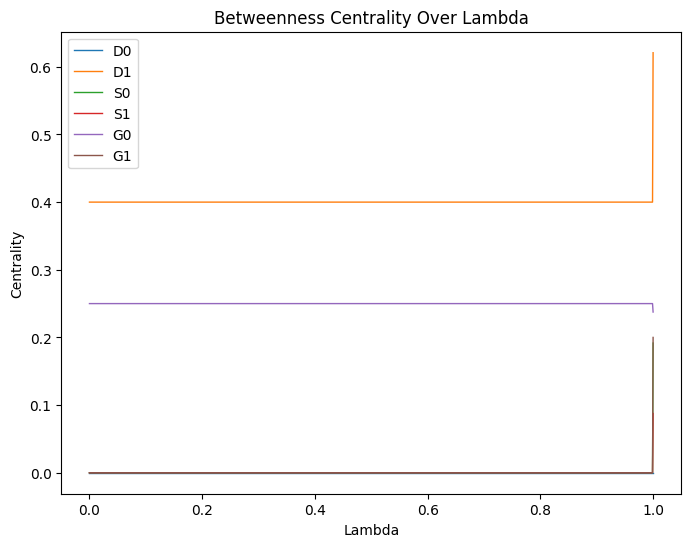

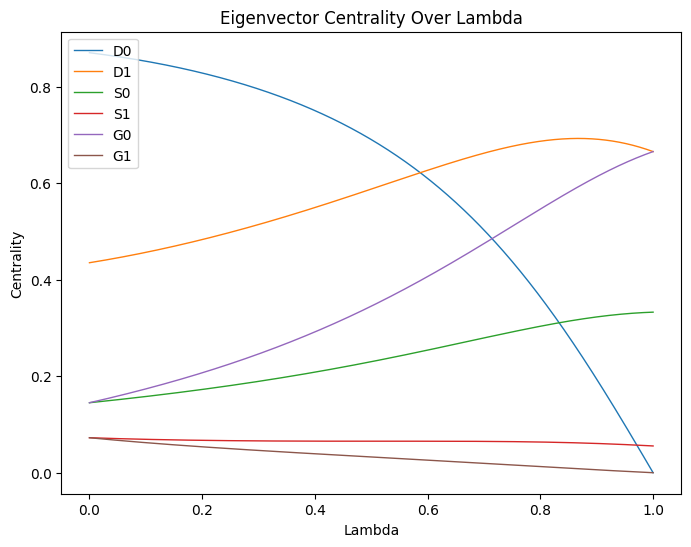

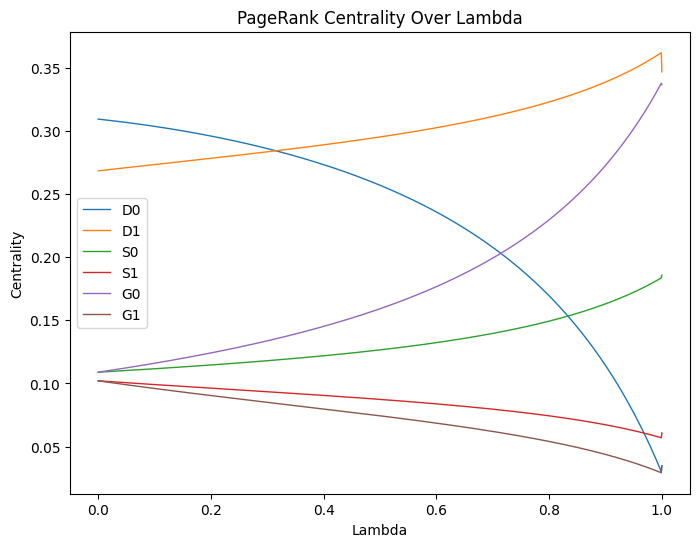

In [57]:
# Modify Lambda_values to be a list of Lambda values
Lambda_values = list(np.linspace(0, 1, 1000))  # Example Lambda values
p=0.5
# Initialize dictionaries to store centrality measures for each node at each Lambda value
betweenness_centrality_values = {Lambda: [] for Lambda in Lambda_values}
eigenvector_centrality_values = {Lambda: [] for Lambda in Lambda_values}
pagerank_centrality_values = {Lambda: [] for Lambda in Lambda_values}

# Calculate centrality measures for each Lambda value
for Lambda in Lambda_values:
    # Assign probabilities to the graph based on Lambda (you can skip this step if not needed)
    graph_with_probs = assign_probabilities_to_graph_with_lambda(graph_forLGOL.copy(), p, Lambda)

    # Calculate betweenness centrality with modified weights
    graph_for_betweenness = graph_with_probs.copy()
    for u, v, d in graph_for_betweenness.edges(data=True):
        if d['probability'] != 0:  # Avoid division by zero
            d['weight'] = 1 / d['probability']
        else:
            d['weight'] = float('inf')  # Assign a very high weight for zero probability

    # Calculate betweenness centrality with modified weights
    betweenness_centrality = nx.betweenness_centrality(graph_for_betweenness, weight='weight')
 
    # Calculate eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(graph_with_probs, weight='probability')

    # Calculate pagerank centrality
    pagerank_centrality = nx.pagerank(graph_with_probs, weight='probability')

    # Store the centrality values for each Lambda
    betweenness_centrality_values[Lambda] = [betweenness_centrality[node] for node in graph.nodes()]
    eigenvector_centrality_values[Lambda] = [eigenvector_centrality[node] for node in graph.nodes()]
    pagerank_centrality_values[Lambda] = [pagerank_centrality[node] for node in graph.nodes()]

# Function to plot centrality measures for each centrality
def plot_and_save_centrality_over_lambda(centrality_values, title, filename_prefix, save_path):
    plt.figure(figsize=(8, 6))
    legend_nodes = ['D0', 'D1', 'S0', 'S1', 'G0', 'G1']

    for node in legend_nodes:
        node_values = {Lambda: values[legend_nodes.index(node)] for Lambda, values in centrality_values.items()}
        plt.plot(centrality_values.keys(), node_values.values(), label=f'{node}', linewidth=1) 
    
    plt.xlabel('Lambda')
    plt.ylabel('Centrality')
    plt.title(title)
    plt.legend()
 
    filename = f'{filename_prefix}.png'
    plt.savefig(os.path.join(save_path, filename))
    plt.show()
    plt.close()



centrality_folder = os.path.join(save_path, "centrality_measures"+"\\LGOL")
os.makedirs(centrality_folder, exist_ok=True)

# Plot and save the centrality measures for each centrality
plot_and_save_centrality_over_lambda(betweenness_centrality_values, "Betweenness Centrality Over Lambda", "betweenness_centrality_over_lambda", centrality_folder)
plot_and_save_centrality_over_lambda(eigenvector_centrality_values, "Eigenvector Centrality Over Lambda", "eigenvector_centrality_over_lambda", centrality_folder)
plot_and_save_centrality_over_lambda(pagerank_centrality_values, "PageRank Centrality Over Lambda", "pagerank_centrality_over_lambda", centrality_folder)


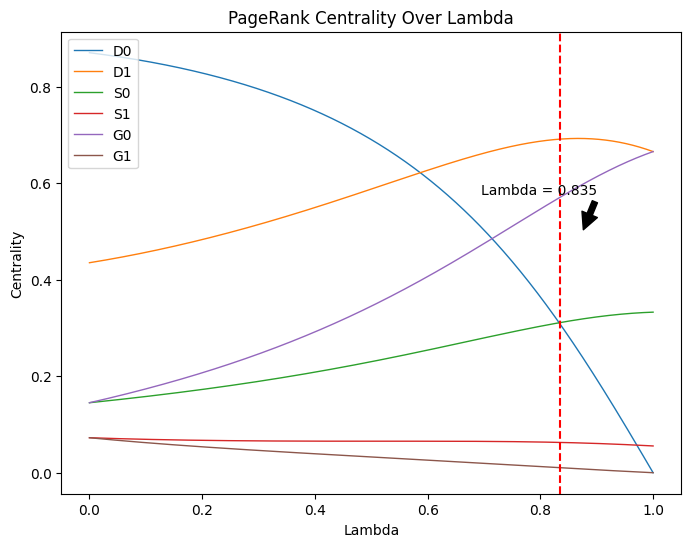

In [61]:
def plot_and_save_centrality_over_lambda(centrality_values, title, filename_prefix, save_path):
    plt.figure(figsize=(8, 6))
    legend_nodes = ['D0', 'D1', 'S0', 'S1', 'G0', 'G1']

    for node in legend_nodes:
        node_values = {Lambda: values[legend_nodes.index(node)] for Lambda, values in centrality_values.items()}
        plt.plot(centrality_values.keys(), node_values.values(), label=f'{node}', linewidth=1) 
    plt.axvline(x=0.835, color='red', linestyle='--')

    plt.xlabel('Lambda')
    plt.ylabel('Centrality')
    plt.title(title)
    plt.legend()
    plt.annotate('Lambda = 0.835', xy=(0.875, 0.5), xytext=(0.9, 0.6),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='right', verticalalignment='top')

    filename = f'{filename_prefix}.png'
    plt.savefig(os.path.join(save_path, filename))
    plt.show()
    plt.close()

plot_and_save_centrality_over_lambda(eigenvector_centrality_values, "PageRank Centrality Over Lambda", "pagerank_centrality_over_lambda", centrality_folder)
